In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from sklearn.model_selection import train_test_split
from soluciones_helper import plot_boundaries, get_polynimial_set
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Importo modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Obtengo dataset

### TODO: Conseguir otro dataset con features de dimensión 2 y probar resultados

In [10]:
# Cargo dataset Estudiantes 
dataset = np.genfromtxt('./datasets/student_admission.txt', delimiter=',')
# Descomentar para usar otro dataset
#dataset = np.genfromtxt('./chip_tests.txt', delimiter=',')
print('Dimensión dataset:',dataset.shape)
# Imprimo primeros 10 elementos
print(dataset[:10])

Dimensión dataset: (100, 3)
[[ 34.62365962  78.02469282   0.        ]
 [ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]
 [ 61.10666454  96.51142588   1.        ]
 [ 75.02474557  46.55401354   1.        ]
 [ 76.0987867   87.42056972   1.        ]
 [ 84.43281996  43.53339331   1.        ]]


In [11]:
# Las dos primeras columnas corresponden a las notas de los exámenes
X = dataset[:,0:2]
# La última columna corresponde a aprobado o no aprobado (1 o 0)
y = dataset[:,2]

### TODO: Modificar el ramdom_state y ver que ocurre. Que pasa con el dataset?
Respuesta:


In [12]:
# Divido el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=1)

# Naive Bayes
http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

### TODO: Cambiar las priors: por ejemplo priors=[ 0.1, 0.9]. Que cambios nota?
respuesta:

In [43]:
# Defino el modelo de clasificación como Naive Bayes Gaussiano
clf_bayes = GaussianNB(priors=[0.5,0.5])
# Entreno el modelo con el dataset de entrenamiento
clf_bayes.fit(X_train, y_train)
# Calculo el score (Exactitud) con el dataset de testeo
score_test_bayes = clf_bayes.score(X_test, y_test)

# Calculo tambien el score del dataset de entrenamiento para comparar
score_train_bayes = clf_bayes.score(X_train, y_train)

print('Test Accuracy (Exactitud):',score_test_bayes)
print('Train Accuracy (Exactitud):',score_train_bayes)
print('means class 1 (no aprobados):',clf_bayes.theta_[0,:])
print('means class 2 (aprobados):',clf_bayes.theta_[1,:])
print('vars class 1 (no aprobados):',clf_bayes.sigma_[0,:])
print('vars class 2 (aprobados):',clf_bayes.sigma_[1,:])

Test Accuracy (Exactitud): 0.9
Train Accuracy (Exactitud): 0.883333333333
means class 1 (no aprobados): [ 48.87646192  56.17574864]
means class 2 (aprobados): [ 71.76536357  77.56350354]
vars class 1 (no aprobados): [ 259.77501217  230.28532015]
vars class 2 (aprobados): [ 227.15250024  208.82540191]


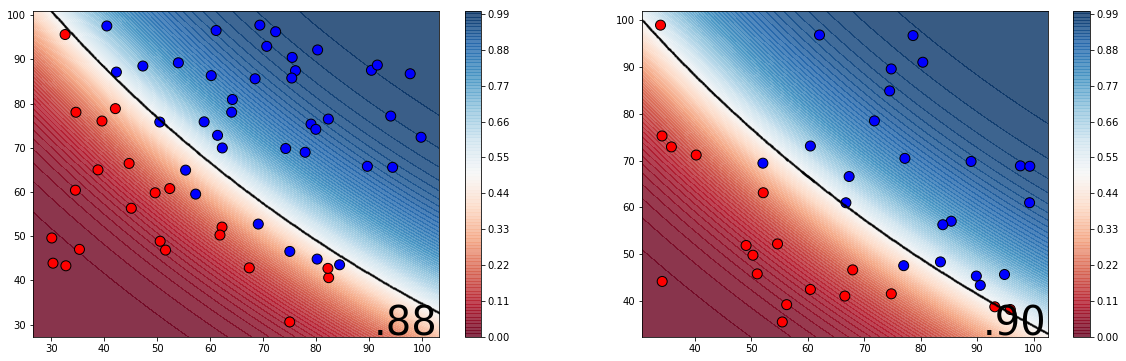

In [44]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plot_boundaries(X_train, y_train, score_train_bayes, clf_bayes.predict_proba, ax=ax1)
plot_boundaries(X_test, y_test, score_test_bayes, clf_bayes.predict_proba, ax=ax2)
plt.show()

# Regresión logística
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### TODO: Cambiar fit_intercept=False. Que ocurre? Por que?
Respuesta:

In [50]:
# Defino el modelo de clasificación como Regresion Logistica
C1 = 1000000000
clf_logist = LogisticRegression(C=C1, fit_intercept=True)

# Entreno el modelo con el dataset de entrenamiento
clf_logist.fit(X_train, y_train)
# Calculo el score (Exactitud) con el dataset de testeo
score_test_logist = clf_logist.score(X_test, y_test)

# Calculo tambien el score del dataset de entrenamiento para comparar
score_train_logist = clf_logist.score(X_train, y_train)

print('Test Accuracy (Exactitud):',score_test_logist)
print('Train Accuracy (Exactitud):',score_train_logist)
print('coeficientes:', clf_logist.coef_)
print('intercept:', clf_logist.intercept_)

Test Accuracy (Exactitud): 0.9
Train Accuracy (Exactitud): 0.916666666667
coeficientes: [[ 0.25108352  0.22646356]]
intercept: [-29.00881048]


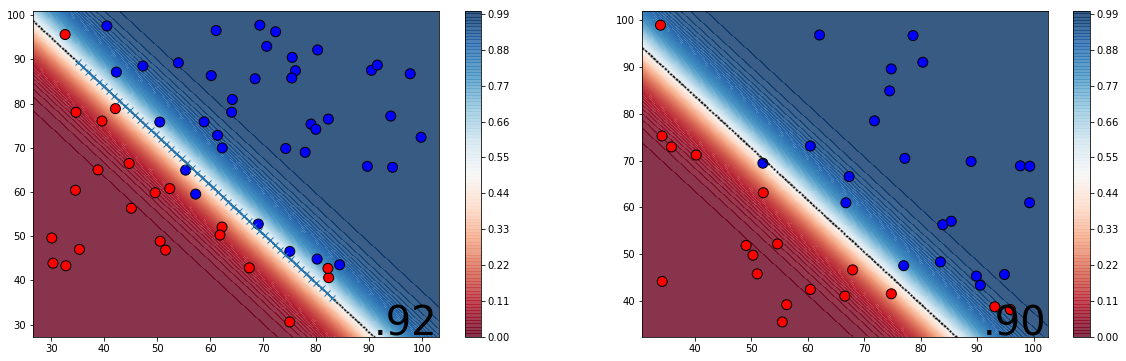

In [51]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plot_boundaries(X_train, y_train, score_train_logist, clf_logist.predict_proba, ax=ax1)
plot_boundaries(X_test, y_test, score_test_logist, clf_logist.predict_proba, ax=ax2)

B = -clf_logist.intercept_/clf_logist.coef_[0][1]
A = -clf_logist.coef_[0][0]/clf_logist.coef_[0][1]
X = np.linspace(35,83,50)
Y = A*X + B

ax1.plot(X, Y, marker='x')
plt.show()

# Regresion Logística polinomial

### TODO: Cambiar el grado y jugar con C1. Que cosas nota? Recordar que valores pequenós de C1 disminuyen el overfitting y valores grandes lo aumentan.
Resouesta:

In [28]:
degree = 2
X_train_degree = get_polynimial_set(X_train, degree=degree)
X_test_degree = get_polynimial_set(X_test, degree=degree)

Grado 2

$\begin{bmatrix}w_0X_1^0X_2^0 & w_1X_1^1X_2^0 & w_2X_1^0X_2^1 & w_3X_1^2X_2^0 & w_4X_1^1X_2^1 & w_5X_1^0X_2^2\end{bmatrix}$

In [29]:
print(X_train_degree[:10])

[[  1.00000000e+00   4.20754545e+01   7.88447860e+01   1.77034387e+03
    3.31743021e+03   6.21650028e+03]
 [  1.00000000e+00   3.45245139e+01   6.03963425e+01   1.19194206e+03
    2.08515436e+03   3.64771818e+03]
 [  1.00000000e+00   5.04581598e+01   7.58098595e+01   2.54602589e+03
    3.82522601e+03   5.74713480e+03]
 [  1.00000000e+00   5.39710521e+01   8.92073501e+01   2.91287447e+03
    4.81461455e+03   7.95795132e+03]
 [  1.00000000e+00   5.72387063e+01   5.95142820e+01   3.27626950e+03
    3.40652051e+03   3.54194976e+03]
 [  1.00000000e+00   5.15477203e+01   4.68562903e+01   2.65716746e+03
    2.41533494e+03   2.19551194e+03]
 [  1.00000000e+00   6.22226758e+01   5.20609919e+01   3.87166138e+03
    3.23937422e+03   2.71034688e+03]
 [  1.00000000e+00   9.04485510e+01   8.75087918e+01   8.18094037e+03
    7.91504341e+03   7.65778864e+03]
 [  1.00000000e+00   8.01901808e+01   4.48216289e+01   6.43046509e+03
    3.59425453e+03   2.00897842e+03]
 [  1.00000000e+00   5.53400176e+01  

In [30]:
# Defino el modelo de clasificación como Regresion Logistica
C1 = 100000
clf_logist_pol = LogisticRegression(C=C1, fit_intercept=False)

# Entreno el modelo con el dataset de entrenamiento
clf_logist_pol.fit(X_train_degree, y_train)

# Calculo el score (Exactitud) con el dataset de testeo
score_test_logist_pol = clf_logist_pol.score(X_test_degree, y_test)

# Calculo tambien el score del dataset de entrenamiento para comparar
score_train_logist_pol = clf_logist_pol.score(X_train_degree, y_train)

print('Test Accuracy (Exactitud):',score_test_logist_pol)
print('Train Accuracy (Exactitud):',score_train_logist_pol)
print('coeficientes:', clf_logist_pol.coef_)
print('intercept:', clf_logist_pol.intercept_)

Test Accuracy (Exactitud): 1.0
Train Accuracy (Exactitud): 1.0
coeficientes: [[ -4.59237208e-02  -1.26656589e+00  -1.46342890e+00   1.13537323e-03
    4.34048679e-02   3.02790120e-03]]
intercept: 0.0


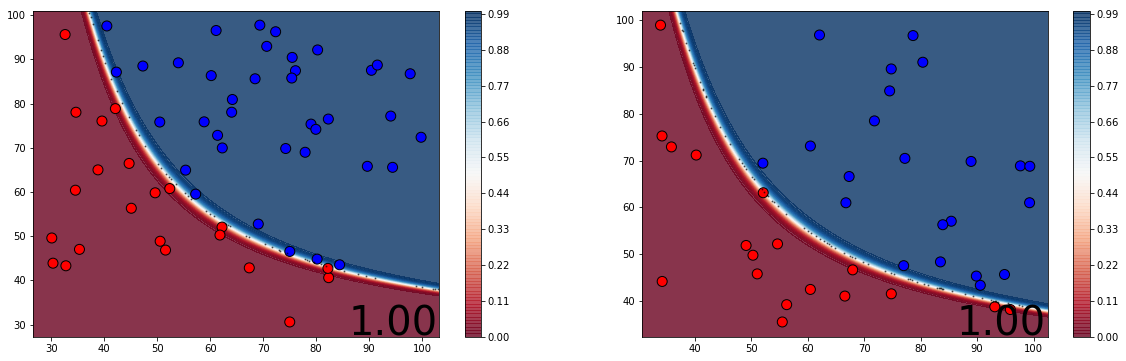

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plot_boundaries(X_train, y_train, score_train_logist_pol, clf_logist_pol.predict_proba, degree=degree, ax=ax1)
plot_boundaries(X_test, y_test, score_test_logist_pol, clf_logist_pol.predict_proba, degree=degree, ax=ax2)
plt.show()

# Red Neuronal

### TODO: Jugan con distintos valores de hidden_layer_sizes, activation y solver. Investigar en la documentación que opciones hay en cada caso

In [32]:
from sklearn.neural_network import MLPClassifier

In [37]:
# Defino el modelo de clasificación como Regresion Logistica
# (hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, 
# batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, 
# max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, 
# momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
# beta_1=0.9, beta_2=0.999, epsilon=1e-08)[source]

clf_MPL = MLPClassifier(solver='lbfgs',hidden_layer_sizes=(30,30), activation='logistic', alpha=0.0, momentum=0, 
                        max_iter=1000, random_state=1)

# Entreno el modelo con el dataset de entrenamient
clf_MPL.fit(X_train, y_train)
# Calculo el score (Exactitud) con el dataset de testeo
score_test_MLP = clf_MPL.score(X_test, y_test)

# Calculo tambien el score del dataset de entrenamiento para comparar
score_train_MPL = clf_MPL.score(X_train, y_train)

print('Test Accuracy (Exactitud):',score_test_MLP)
print('Train Accuracy (Exactitud):',score_train_MPL)
#print('coeficientes:', score_test_MLP.coef_)
#print('intercept:', score_test_MLP.intercept_)

Test Accuracy (Exactitud): 0.95
Train Accuracy (Exactitud): 1.0


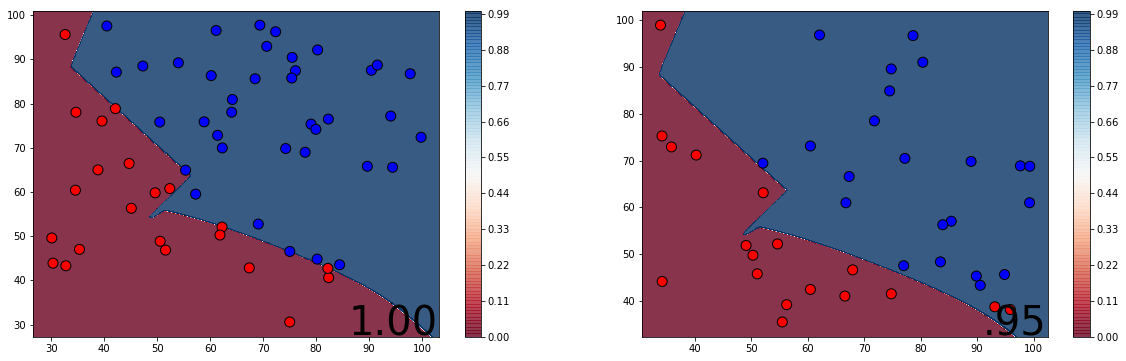

In [38]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plot_boundaries(X_train, y_train, score_train_MPL, clf_MPL.predict_proba, ax=ax1)
plot_boundaries(X_test, y_test, score_test_MLP, clf_MPL.predict_proba, ax=ax2)

plt.show()

# KNeighborsClassifier

TODO: Investigar este clasificador e implementarlo de la mismo forma que se implementaros los otros

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# Defino el modelo de clasificación como KNeighborsClassifier
# TODO: Implementar y jugar con los parametros, por ejemplo n_neighbors

# Entreno el modelo con el dataset de entrenamiento
# TODO: Entrenar modelo

# Calculo el score (Exactitud) con el dataset de testeo
# TODO

# Calculo tambien el score del dataset de entrenamiento para comparar
# TODO

# Imprimir score de testing y de training
# TODO


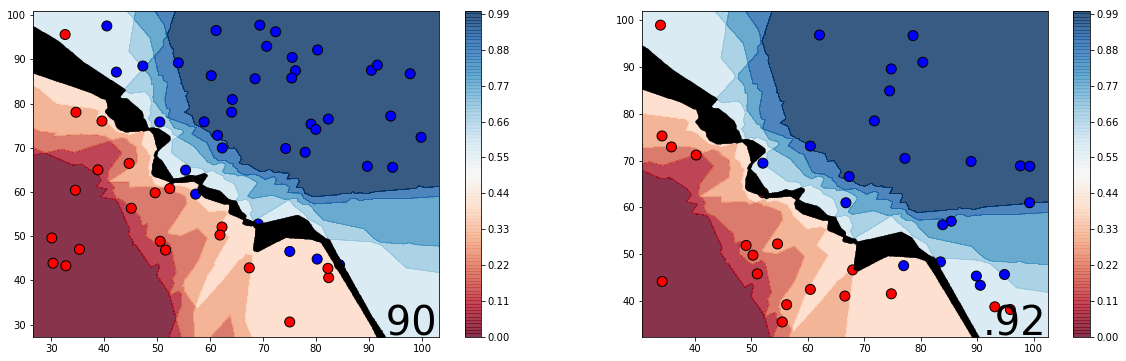

In [65]:
# Graficarlos
# TODO